# Global consumer electronic brand sales analysis



## Importing libraries and data

During this step, we import the necessary libraries and load the data required for further analysis. 

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, MetaData, Table, ForeignKey
from sqlalchemy import Column, Integer, String, inspect, Float, Date, join, select
import os
import plotly.graph_objs as go 
from plotly.offline import init_notebook_mode,iplot
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
init_notebook_mode(connected=True) 

In [51]:
customers = pd.read_csv('data/Customers.csv', encoding='ISO-8859-1')
exchange_rates = pd.read_csv('data/Exchange_Rates.csv', encoding='ISO-8859-1')
products = pd.read_csv('data/Products.csv', encoding='ISO-8859-1')
sales = pd.read_csv('data/Sales.csv', encoding='ISO-8859-1')
stores = pd.read_csv('data/Stores.csv', encoding='ISO-8859-1')

## Assigning correct datatypes to variables

In this step, we will assign the appropriate data types to the DataFrame columns to ensure optimal performance, memory usage, and accurate analysis.
This version emphasizes the purpose of assigning correct data types and includes the benefits like performance, memory optimization, and data accuracy.

In [3]:
customers.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [4]:
customers['Gender'] = customers['Gender'].astype('category')
customers['Birthday'] = customers['Birthday'].astype('datetime64[ns]')

In [72]:
exchange_rates.head()

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415


In [71]:
exchange_rates['Date'] = exchange_rates['Date'].astype('datetime64[ns]')
exchange_rates['Currency'] = exchange_rates['Currency'].astype('category')

In [45]:
products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,21.57,101,MP4&MP3,1,Audio


In [44]:
products['Unit Price USD'] = products['Unit Price USD'].replace('[\$,]', '', regex=True).astype('float64')

In [69]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD


In [68]:
sales['Order Date'] = sales['Order Date'].astype('datetime64[ns]')
sales['Delivery Date'] = sales['Delivery Date'].astype('datetime64[ns]')


In [10]:
stores.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [11]:
stores['Open Date'] = stores['Open Date'].astype('datetime64[ns]')

## Data Cleaning

This step examines the shape of the datasets and identifies any irregularities or anomalies in the data.

### Exploring the shape of the datasets

In [12]:
customers.shape

(15266, 10)

In [13]:
exchange_rates.shape

(11215, 3)

In [14]:
products.shape

(2517, 10)

In [15]:
sales.shape

(62884, 9)

In [16]:
stores.shape

(67, 5)

The datasets have varying shapes, with the stores dataset being the smallest in terms of observations, while the sales dataset contains the most observations.

### Exploring the number of missing values in each dataset

In [17]:
(customers.isnull().sum(axis=1) > 0).sum()

10

In [18]:
(exchange_rates.isnull().sum(axis=1) > 0).sum()

0

In [19]:
(products.isnull().sum(axis=1) > 0).sum()

0

In [20]:
(sales.isnull().sum(axis=1) > 0).sum()

49719

In [21]:
(stores.isnull().sum(axis=1) > 0).sum()

1

The number of rows with missing values is insignificant in most datasets and can be safely dropped. However, in the sales dataset, out of 63,000 rows, almost 50,000 contain missing values, which makes dropping rows impractical. A better approach would be to identify which variables (columns) in the sales dataset contain the most missing values and decide how to handle them, such as by imputing missing values or analyzing why they are missing.

### Dealing with missing values

In [22]:
customers.dropna(inplace=True)

In [23]:
stores.dropna(inplace=True)

In [24]:
missing_values = sales.isnull().sum()

In [25]:
missing_values

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

The sales dataset contains missing values exclusively in the Delivery Date column, where the dates weren't recorded properly. A potential solution to fill these missing values is to calculate the average delivery time in days and use this value to estimate the missing Delivery Dates by adding the calculated number of days to the corresponding Order Date. This approach will allow for reasonable estimations of the missing Delivery Dates, enabling us to fill in the missing data with a method grounded in the dataset's historical patterns.

In [139]:
average_delivery_time = (sales[-sales['Delivery Date'].isnull()]['Delivery Date'] - sales[-sales['Delivery Date'].isnull()]['Order Date']).mean()

In [140]:
sales.loc[sales['Delivery Date'].isnull(), 'Delivery Date'] = sales.loc[sales['Delivery Date'].isnull(), 'Order Date'] + average_delivery_time

## Setting up SQLite database

Setting up the SQLite database and loading the required data for efficient access.

In [46]:
engine = create_engine("sqlite:///my_database.db")
metadata = MetaData()

In [47]:
# Upload the DataFrames to the SQLite database
customers.to_sql('customers', engine, if_exists='replace', index=False)
exchange_rates.to_sql('exchange_rates', engine, if_exists='replace', index=False)
products.to_sql('products', engine, if_exists='replace', index=False)
sales.to_sql('sales', engine, if_exists='replace', index=False)
stores.to_sql('stores', engine, if_exists='replace', index=False)


66

## Descriptive Statistics

This section offers a comprehensive overview of the dataset, including key descriptive statistics for the variables.

In [144]:
sales.describe()

,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


## Data Visualization

This step includes exploratory data visualization to enhance understanding of the dataset.

### Transactions per Country

In [30]:
customers_sales_df = pd.read_sql('''SELECT * FROM sales
INNER JOIN customers ON sales.CustomerKey = customers.CustomerKey;''', engine)

In [31]:
sales_count = customers_sales_df.value_counts('Country').reset_index().rename(columns={0:'Count'})
sales_count.head()

,Country,Count
0,United States,33767
1,United Kingdom,8140
2,Germany,5956
3,Canada,5415
4,Australia,2941


In [32]:
data = go.Choropleth(
    locations=sales_count['Country'],
    z=sales_count['Count'],
    locationmode = "country names",
    text=sales_count['Country'],
    colorbar={'title': '# Sales'},
    colorscale='Blugrn',  
)

layout = go.Layout(
    title='Sales per Country',
    geo=dict(
        showframe=False,
        projection={'type': 'natural earth'}  ,
        bgcolor='grey',
    ),
    paper_bgcolor='grey',
)



choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

The majority of the company's sales are concentrated in North America, with approximately 40,000 transactions in the United States and Canada. Europe is another key market, with Germany and the United Kingdom leading in sales.

### Revenue per Country

In [77]:
products_sales_df = pd.read_sql('''SELECT Sales.Quantity, customers.Country, products.'Unit Price USD', sales.'Currency Code', exchange_rates.Exchange, exchange_rates.Date FROM sales
INNER JOIN products ON sales.ProductKey = products.ProductKey
INNER JOIN customers ON sales.CustomerKey = customers.CustomerKey
INNER JOIN exchange_rates ON sales.'Currency Code' = exchange_rates.Currency AND sales.'Order Date' = exchange_rates.Date''', engine)

In [104]:
# Calculating revenue per transaction, converted to USD. 
products_sales_df['Revenue'] = (products_sales_df['Unit Price USD'] * products_sales_df['Quantity']) / products_sales_df['Exchange']
products_sales_df

,Quantity,Country,Unit Price USD,Currency Code,Exchange,Date,Revenue
0,1,Canada,68.00,CAD,1.3884,2016-01-01 00:00:00.000000,48.977240
1,2,United States,427.00,USD,1.0000,2016-01-01 00:00:00.000000,854.000000
2,1,United States,665.94,USD,1.0000,2016-01-01 00:00:00.000000,665.940000
3,7,Canada,322.00,CAD,1.3884,2016-01-01 00:00:00.000000,1623.451455
4,1,Canada,326.00,CAD,1.3884,2016-01-01 00:00:00.000000,234.802651
...,...,...,...,...,...,...,...
62849,3,United States,139.00,USD,1.0000,2021-02-20 00:00:00.000000,417.000000
62850,4,Germany,120.00,EUR,0.8238,2021-02-20 00:00:00.000000,582.665696
62851,2,Canada,109.99,CAD,1.2610,2021-02-20 00:00:00.000000,174.448850
62852,2,Canada,70.13,CAD,1.2610,2021-02-20 00:00:00.000000,111.229183


In [112]:
country_revenue = products_sales_df.groupby('Country')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
country_revenue['Revenue'] = country_revenue['Revenue'].astype('int64')

In [133]:
country_revenue['Revenue'].median()

3179185.5

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'United States'),
  Text(1, 0, 'United Kingdom'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Canada'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'France')])

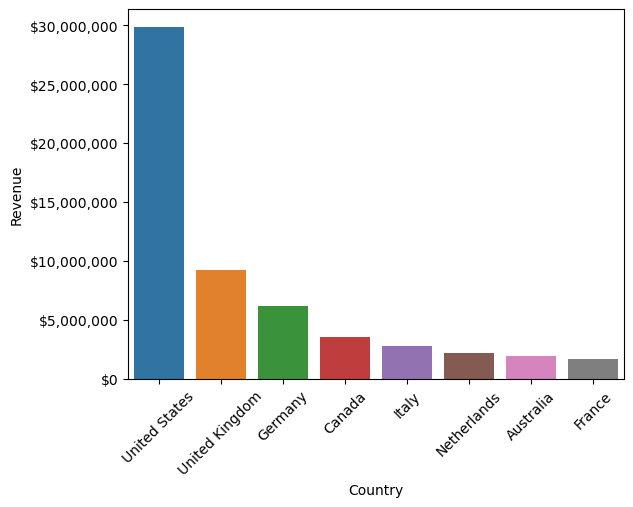

In [130]:
sns.barplot(x='Country',y='Revenue',data=country_revenue)
plt.ticklabel_format(style='plain', axis='y')
formatter = FuncFormatter(lambda x, _: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=45)


The United States is the largest buyer, with total revenue nearing `$30 million` during the period, followed by the United Kingdom at approximately `$10 million`. These two countries significantly outspend others, where the median revenue is around `$3.1 million`. The lowest spenders in this period are Australia and France.